# 0. Описание задачи.

Задача - проанализаровать набор данных, а именно видеоигры, и решить задачу классификации.
На основе обучающей и тестовой выборки исследовать жанр игры.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# 1. Чтение данных.


In [2]:
url = "https://raw.githubusercontent.com/Sermjazhko/ML/master/imdb-videogames.csv"

data_raw = pd.read_csv(url)

В таблице представлено более 20 тысяч видеоигр. Для каждой видеоигры указаны: 

номер, название игры, жанры, год выпуска, возрастной рейтинг, рейтинг игры, количество просмотров, краткий сюжет.

In [3]:
data_raw.shape

(20803, 17)

То есть 20 803 различных видеоигры и 17 признаков.

Для примера первые пять строк данных: 

In [4]:
data_raw.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [5]:
data_raw["votes"] = data_raw["votes"].apply(lambda l: float(str(l).replace(",", "")))

# 2. Визуализация данных. 

Все признаки фильмов: 

In [6]:
data_raw.columns

Index(['Unnamed: 0', 'name', 'url', 'year', 'certificate', 'rating', 'votes',
       'plot', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')

Сводная информация для признаков. В нашей задаче в качестве количественных признаков выступают рейтинг, количество просмотров, год выпуска. 
Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей:

In [7]:
data_raw.describe()

,Unnamed: 0,year,rating,votes
count,20803.000000,20536.000000,11600.000000,11600.000000
mean,10401.000000,2005.568611,7.047526,630.599138
std,6005.453161,11.846028,1.235204,2703.170342
min,0.000000,1952.000000,1.000000,5.000000
25%,5200.500000,1997.000000,6.400000,17.000000
50%,10401.000000,2008.000000,7.200000,48.000000
75%,15601.500000,2016.000000,7.900000,205.000000
max,20802.000000,2027.000000,9.700000,60597.000000


В целом видеоигры имеют оценку (рейтинг) выше среднего. Т.е. по 10-балльной шкале средняя оценка около 7.05 на разных платформах. Есть игры как с высоким рейтингом и большим количеством просмотров, так и с совсем низкими оценками. 

Для удобства добавим столбец, определяющий рейтинг видеоигры. Среднее значение видеоигр ~ 7, следовательно, за 1 обозначим игры, преодолевшие средние сборы, 0 - иначе. 

In [8]:
data_raw["boolRating"] = np.where(data_raw["rating"] >= 7.0, 1, 0) 
data_raw["Action"] = np.where(data_raw["Action"] == True, 1, 0)
data_raw["Adventure"] = np.where(data_raw["Adventure"] == True, 1, 0)
data_raw["Comedy"] = np.where(data_raw["Comedy"] == True, 1, 0)
data_raw["Crime"] = np.where(data_raw["Crime"] == True, 1, 0)
data_raw["Family"] = np.where(data_raw["Family"] == True, 1, 0)
data_raw["Fantasy"] = np.where(data_raw["Fantasy"] == True, 1, 0)
data_raw["Mystery"] = np.where(data_raw["Mystery"] == True, 1, 0)
data_raw["Sci-Fi"] = np.where(data_raw["Sci-Fi"] == True, 1, 0)
data_raw["Thriller"] = np.where(data_raw["Thriller"] == True, 1, 0)

Построим диаграмму рассеивания: зависимость просмотров от рейтинга игры. 

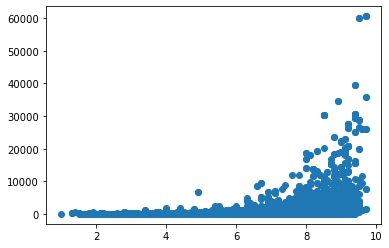

In [9]:
plt.scatter(data_raw['rating'], data_raw['votes'])
pass

Видно, что чем выше оценка той или иной игры, тем больше просмотров.


Построим зависимость рейтинга от оценки фильма на платформе Rotten Tomatoes: 

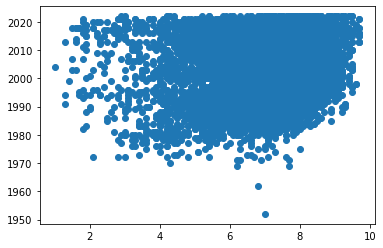

In [10]:
plt.scatter(data_raw['rating'], data_raw['year'])
pass

Также можно построить зависимость количества просмотров от года. Построим рандомно 1000 точек. 

In [11]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)

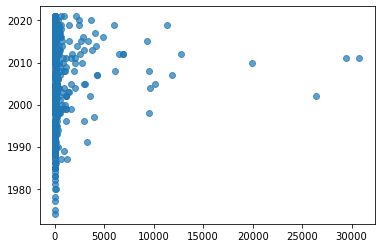

In [12]:

plt.scatter(data_raw.iloc[random_subset]['votes'], data_raw.iloc[random_subset]['year'],alpha=0.7)
pass

In [13]:
data = data_raw.loc[:, ['name', 'year', 'certificate', 'rating', 'votes',
       'Comedy', 'boolRating']].copy()

In [14]:
data.head()

,name,year,certificate,rating,votes,Comedy,boolRating
0,Spider-Man,2018.0,T,9.2,20759.0,0,1
1,Red Dead Redemption II,2018.0,M,9.7,35703.0,0,1
2,Grand Theft Auto V,2013.0,M,9.5,59986.0,0,1
3,God of War,2018.0,M,9.6,26118.0,0,1
4,Uncharted 4: A Thief's End,2016.0,T,9.5,28722.0,0,1


Построим все возможные диаграммы рассеивания для каждой пары переменных:

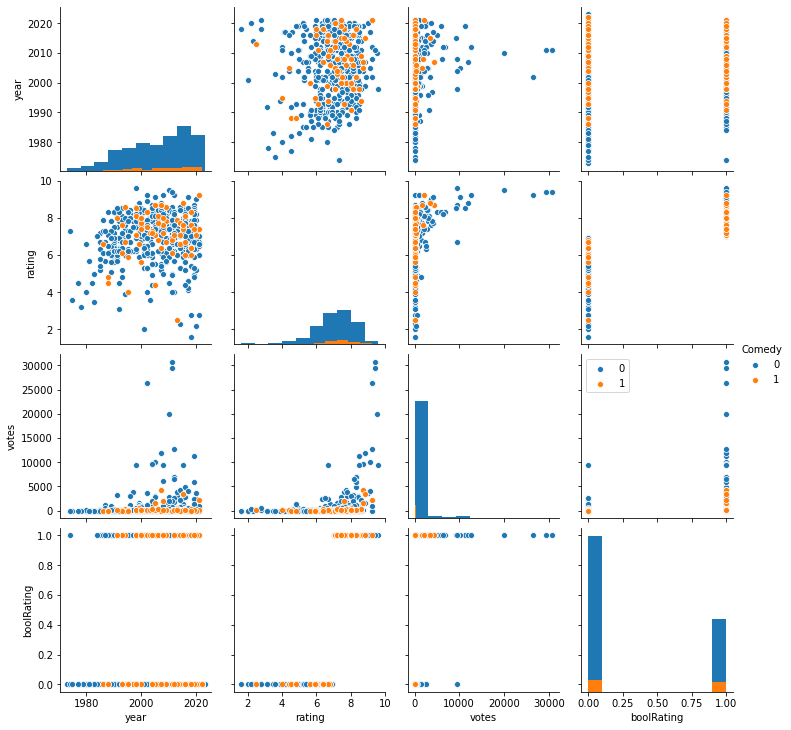

In [15]:
sns.pairplot(data.iloc[random_subset], hue='Comedy', diag_kind='hist')
plt.legend()
pass

Отдельно построим гистограмму рейтинга:

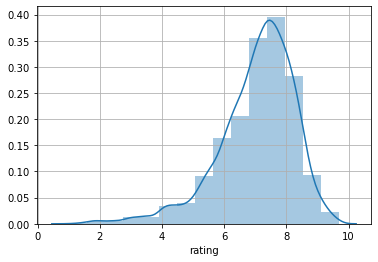

In [16]:
sns.distplot(data_raw['rating'], bins=15)
plt.grid()
pass

Построим корреляционную матрицу:

In [17]:
corr_mat = data.corr()
corr_mat

,year,rating,votes,Comedy,boolRating
year,1.000000,0.156791,0.098998,0.069104,0.022561
rating,0.156791,1.000000,0.256408,0.037484,0.773432
votes,0.098998,0.256408,1.000000,-0.025128,0.150969
Comedy,0.069104,0.037484,-0.025128,1.000000,0.065028
boolRating,0.022561,0.773432,0.150969,0.065028,1.000000


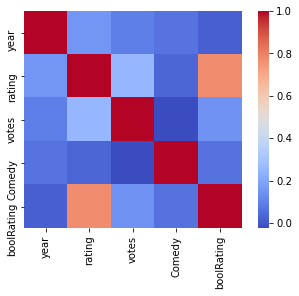

In [19]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Из матрицы корреляции видно, что  некоторые оценки на различных платформах коррелируют, то есть на различных платформах примерно один и тот же рейтинг фильма по мнению зрителей и критиков. Также коррелируют кассовые сборы и оценка кассовых сборов.

# 3. Обработка пропущенных значений


Пропущенные значения в таблице представлены значениями np.nan. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [20]:
data_raw.isna().sum()

Unnamed: 0         0
name               0
url                0
year             267
certificate    12900
rating          9203
votes           9203
plot               0
Action             0
Adventure          0
Comedy             0
Crime              0
Family             0
Fantasy            0
Mystery            0
Sci-Fi             0
Thriller           0
boolRating         0
dtype: int64

В нашем случае пропущенных значений довольно много, чтобы их удалить. Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [22]:
data_raw

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,boolRating
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,20759.0,"When a new villain threatens New York City, Pe...",1,1,0,0,0,1,0,0,0,1
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,35703.0,Amidst the decline of the Wild West at the tur...,1,1,0,1,0,0,0,0,0,1
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,59986.0,Three very different criminals team up for a s...,1,0,0,1,0,0,0,0,0,1
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,26118.0,"After wiping out the gods of Mount Olympus, Kr...",1,1,0,0,0,0,0,0,0,1
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,28722.0,Thrown back into the dangerous underworld he'd...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20798,20798,"Enjoy Your Power, Enjoy Your Choice",https://www.imdb.com/title/tt3845606/?ref_=adv...,2014.0,NaN,NaN,NaN,Add a Plot,0,0,0,0,0,0,0,0,1,0
20799,20799,RedSun2020,https://www.imdb.com/title/tt0790739/?ref_=adv...,2004.0,NaN,NaN,NaN,Joseph gets kidnapped and it's the player's jo...,0,0,0,0,0,0,0,0,1,0
20800,20800,Shutter,https://www.imdb.com/title/tt5119948/?ref_=adv...,2015.0,NaN,NaN,NaN,A tech support man who uses a drone to investi...,0,0,0,0,0,0,0,0,1,0
20801,20801,The Music Machine,https://www.imdb.com/title/tt5142082/?ref_=adv...,2015.0,NaN,NaN,NaN,A young teenage girl and the ghost of a dead m...,0,0,0,0,0,0,0,0,1,0


In [23]:
data_raw['certificate'].fillna(data_raw['certificate'].mode().iloc[0], inplace=True)

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [24]:
data_raw.isna().sum()

Unnamed: 0        0
name              0
url               0
year            267
certificate       0
rating         9203
votes          9203
plot              0
Action            0
Adventure         0
Comedy            0
Crime             0
Family            0
Fantasy           0
Mystery           0
Sci-Fi            0
Thriller          0
boolRating        0
dtype: int64

In [26]:
data_raw

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,boolRating
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,20759.0,"When a new villain threatens New York City, Pe...",1,1,0,0,0,1,0,0,0,1
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,35703.0,Amidst the decline of the Wild West at the tur...,1,1,0,1,0,0,0,0,0,1
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,59986.0,Three very different criminals team up for a s...,1,0,0,1,0,0,0,0,0,1
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,26118.0,"After wiping out the gods of Mount Olympus, Kr...",1,1,0,0,0,0,0,0,0,1
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,28722.0,Thrown back into the dangerous underworld he'd...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20798,20798,"Enjoy Your Power, Enjoy Your Choice",https://www.imdb.com/title/tt3845606/?ref_=adv...,2014.0,T,NaN,NaN,Add a Plot,0,0,0,0,0,0,0,0,1,0
20799,20799,RedSun2020,https://www.imdb.com/title/tt0790739/?ref_=adv...,2004.0,T,NaN,NaN,Joseph gets kidnapped and it's the player's jo...,0,0,0,0,0,0,0,0,1,0
20800,20800,Shutter,https://www.imdb.com/title/tt5119948/?ref_=adv...,2015.0,T,NaN,NaN,A tech support man who uses a drone to investi...,0,0,0,0,0,0,0,0,1,0
20801,20801,The Music Machine,https://www.imdb.com/title/tt5142082/?ref_=adv...,2015.0,T,NaN,NaN,A young teenage girl and the ghost of a dead m...,0,0,0,0,0,0,0,0,1,0


In [27]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

Проверяем: 

In [28]:
data_raw.isna().sum()

Unnamed: 0     0
name           0
url            0
year           0
certificate    0
rating         0
votes          0
plot           0
Action         0
Adventure      0
Comedy         0
Crime          0
Family         0
Fantasy        0
Mystery        0
Sci-Fi         0
Thriller       0
boolRating     0
dtype: int64

In [31]:
data_raw

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,boolRating
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,20759.0,"When a new villain threatens New York City, Pe...",1,1,0,0,0,1,0,0,0,1
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,35703.0,Amidst the decline of the Wild West at the tur...,1,1,0,1,0,0,0,0,0,1
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,59986.0,Three very different criminals team up for a s...,1,0,0,1,0,0,0,0,0,1
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,26118.0,"After wiping out the gods of Mount Olympus, Kr...",1,1,0,0,0,0,0,0,0,1
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,28722.0,Thrown back into the dangerous underworld he'd...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20798,20798,"Enjoy Your Power, Enjoy Your Choice",https://www.imdb.com/title/tt3845606/?ref_=adv...,2014.0,T,7.2,48.0,Add a Plot,0,0,0,0,0,0,0,0,1,0
20799,20799,RedSun2020,https://www.imdb.com/title/tt0790739/?ref_=adv...,2004.0,T,7.2,48.0,Joseph gets kidnapped and it's the player's jo...,0,0,0,0,0,0,0,0,1,0
20800,20800,Shutter,https://www.imdb.com/title/tt5119948/?ref_=adv...,2015.0,T,7.2,48.0,A tech support man who uses a drone to investi...,0,0,0,0,0,0,0,0,1,0
20801,20801,The Music Machine,https://www.imdb.com/title/tt5142082/?ref_=adv...,2015.0,T,7.2,48.0,A young teenage girl and the ghost of a dead m...,0,0,0,0,0,0,0,0,1,0


# 4. Обработка категориальных признаков.

Столбец 'certificate' содержит категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [33]:
data = data_raw.loc[:, ['name', 'year', 'certificate', 'rating', 'votes',
       'Comedy', 'boolRating']].copy()

In [34]:
data

,name,year,certificate,rating,votes,Comedy,boolRating
0,Spider-Man,2018.0,T,9.2,20759.0,0,1
1,Red Dead Redemption II,2018.0,M,9.7,35703.0,0,1
2,Grand Theft Auto V,2013.0,M,9.5,59986.0,0,1
3,God of War,2018.0,M,9.6,26118.0,0,1
4,Uncharted 4: A Thief's End,2016.0,T,9.5,28722.0,0,1
...,...,...,...,...,...,...,...
20798,"Enjoy Your Power, Enjoy Your Choice",2014.0,T,7.2,48.0,0,0
20799,RedSun2020,2004.0,T,7.2,48.0,0,0
20800,Shutter,2015.0,T,7.2,48.0,0,0
20801,The Music Machine,2015.0,T,7.2,48.0,0,0


In [35]:
data['certificate'] = data['certificate'].astype('category')

In [36]:
data.head()

,name,year,certificate,rating,votes,Comedy,boolRating
0,Spider-Man,2018.0,T,9.2,20759.0,0,1
1,Red Dead Redemption II,2018.0,M,9.7,35703.0,0,1
2,Grand Theft Auto V,2013.0,M,9.5,59986.0,0,1
3,God of War,2018.0,M,9.6,26118.0,0,1
4,Uncharted 4: A Thief's End,2016.0,T,9.5,28722.0,0,1


Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

In [37]:
data['certificate'] = pd.factorize(data['certificate'])[0]

В итоге получим: 

In [38]:
data

,name,year,certificate,rating,votes,Comedy,boolRating
0,Spider-Man,2018.0,0,9.2,20759.0,0,1
1,Red Dead Redemption II,2018.0,1,9.7,35703.0,0,1
2,Grand Theft Auto V,2013.0,1,9.5,59986.0,0,1
3,God of War,2018.0,1,9.6,26118.0,0,1
4,Uncharted 4: A Thief's End,2016.0,0,9.5,28722.0,0,1
...,...,...,...,...,...,...,...
20798,"Enjoy Your Power, Enjoy Your Choice",2014.0,0,7.2,48.0,0,0
20799,RedSun2020,2004.0,0,7.2,48.0,0,0
20800,Shutter,2015.0,0,7.2,48.0,0,0
20801,The Music Machine,2015.0,0,7.2,48.0,0,0


# 5. Нормализация

Стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.
Выполним стандартизацию всех признаков:

In [39]:
data.drop(['name'], axis=1, inplace = True)

In [40]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data.describe()

,year,certificate,rating,votes,Comedy,boolRating
count,20803.000000,20803.000000,20803.000000,20803.000000,20803.000000,20803.000000
mean,2005.599817,0.698601,7.114979,372.864202,0.085709,0.337067
std,11.772941,1.582373,0.925455,2039.146866,0.279940,0.472719
min,1952.000000,0.000000,1.000000,5.000000,0.000000,0.000000
25%,1997.000000,0.000000,7.100000,38.000000,0.000000,0.000000
50%,2008.000000,0.000000,7.200000,48.000000,0.000000,0.000000
75%,2016.000000,1.000000,7.400000,61.000000,0.000000,1.000000
max,2027.000000,20.000000,9.700000,60597.000000,1.000000,1.000000


# 6. Разбиваем данные на обучающую и тестовую выборки.

In [41]:
data_stand.columns

Index(['year', 'certificate', 'rating', 'votes', 'Comedy', 'boolRating'], dtype='object')

Для предсказания жанра будем использовать все входные признаки, кроме 'Comedy', 'boolRating'.

In [42]:
X = data_stand.drop(['Comedy',  'boolRating'], axis=1)
y = data['Comedy']

In [43]:
X.head()

,year,certificate,rating,votes
0,1.053278,-0.441490,2.252969,9.997385
1,1.053278,0.190473,2.793243,17.325940
2,0.628576,0.190473,2.577133,29.234351
3,1.053278,0.190473,2.685188,12.625445
4,0.883397,-0.441490,2.577133,13.902449


### Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(15602, 5201)

# 7. Запустить классификатор ближайших соседей. Вычислить ошибки.

3 соседа

In [50]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))
print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.9258428406614536, Test: 0.9219380888290714. 
Error: Train : 0.07415715933854634, Test: 0.07806191117092867 


7 соседей

In [51]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 7)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.9168055377515704, Test: 0.9111709286675639. 
Error: Train : 0.08319446224842969, Test: 0.08882907133243607 


10 соседей

In [53]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 10)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.9160364055890271, Test: 0.9094404922130359. 
Error: Train : 0.08396359441097295, Test: 0.09055950778696405 


# 8. Сделать выводы

При малом количестве соседей точность на обучающей выборке выше, при увеличении количества соседей до определенного значения точность ухудшается, но это позволит улучшить точность на тестовой выборке.